### Week 3: Cross-validation and random variables

Aim 
- Choose the order of polynomials with cross validation on some simulated data
- Practice `numpy` random number generators
- Practice simulating noisy data from simple linear model

Task
- Create partitions over the data to perform C-fold cross validation
- Check the cross validation results
- Generate normally-distributed random variables
- Use histogram to inspect empirical distribution of random variables
- Plot confidence bounds for a simple linear model

#### Task 0: Cross-validation to determine the order of polynomials </h3>
<p>In this part, we perform a cross-validation to try and choose the polynomial order for linear regression on some synthetic data.</p>
<p>The loss (in our case, this is equal to the squared error) on the training data will always decrease as we make the model more complex, and therefore cannot be used to select how complex the model ought to be. In some cases we may be lucky enough to have an independent test set for model validation but often we will not. In a cross-validation procedure (CV) we split the data into $K$ folds, and train $K$ different models, each with a different data fold removed. This removed fold is used for testing and the performance is averaged over the $K$ different folds.</p>
<p>This process is illustrated in the following figure:</p>
<img src="cvdiagram.png">

#### Task 0.1: We start by generating two datasets - one on which we will perform the CV, and a second independent testing set.
The true model is $f(x; \mathbf{w}) = x - x^2 + 5x^3$

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

np.random.seed(1) # fix random seed such that every time we get the same random numbers

N = 200 # total number of data points 
x = 10*np.random.rand(N,1) - 5 # generate random x
t = 5*x**3 - x**2 + x + 200*np.random.randn(N,1) # generate t according to the true model with additive noise

N_test = 100 # total number of independent testing data points 
x_test = np.linspace(-5,5,N_test)[:,None] # generate independent testing x
t_test = 5*x_test**3 - x_test**2 + x_test + 200*np.random.randn(N_test,1) # generate independent testing t with noise

#### Task 0.2: Cross validation settings  

Make sure you understand what this snippet is doing!
For the function `polynomial`, use the method you implemented as task 2.2 in lab sheet 2.

In [ ]:
max_order = 10 # the maximum polynomial order to be tested
num_folds = 10 # number of folds, C in the slides

# This block of code is used to generate coordinates for the folds. There are mulitple way of doing it. 
sizes = np.tile(np.floor(N/num_folds), num_folds)
sizes[-1] = sizes[-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes)))
c_sizes =c_sizes.astype(int)
print(c_sizes)

#### Task 0.3: Perform cross validation

In [ ]:
cv_loss = ... # preallocate cross validation losses, you need num_folds times max_order+1 of them
ind_loss = ... # preallocate independent testing losses, you need num_folds times max_order+1 of them
train_loss = ... # preallocate training losses, you need num_folds times max_order+1 of them

for k in range(max_order+1): # iterate over all orders
    
    X = ...  # construct the design matrix over all training data using order k
    X_test = ... # construct the design matrix over independent testing data using order k
    
    
    for fold in range(num_folds): # iterate over all folds 
        
        X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0) # select N-C training x 
        t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0) # select N-C training t 
        w = ... # compute least square solution
    
        
        X_fold = X[c_sizes[fold]:c_sizes[fold+1],:] # select C testing x 
        t_fold = t[c_sizes[fold]:c_sizes[fold+1]] # select C testing t 

        
        train_loss[fold,k] = ... # record training loss at k in the current fold
        cv_loss[fold,k] = ... # record cross validation loss at k in the current fold
        ind_loss[fold,k] = ... # record independent testing loss at k in the current fold
        

#### Task 0.4: Plot results

Text(0,0.5,'Mean squared loss')

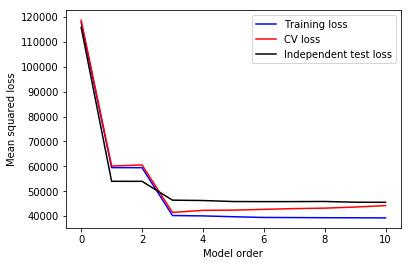

In [ ]:
order = np.arange(max_order+1) # all tested orders
plt.plot(order,train_loss.mean(axis=0),'b-',label="Training loss") # avearage training losses
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss") # avearage CV losses
plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss") # avearage independent testing losses
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')

#### Task 1:  Set up parameters for a Gaussian distribution

In [113]:
import numpy as np
import pylab as plt
%matplotlib inline

np.random.seed(1) # fix random seed such that every time we get the same random numbers

mu = ...# mean, try 1
sigma = ...# standard deviation, try 0.5

#### Task 2:  Generate Gaussian random numbers using `numpy.random.randn` with $\mu$ and $sigma$ in the previous cell

Details of how to use `numpy.random.randn` are available [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

In [114]:
n = ...# number of data points
x = ...# Code to generate the random variable. np.random.randn 
    # generates random numbers from the standard normal distribution
    # N(0,1). For random samples from N(\mu, \sigma^2), 
    # use: sigma * np.random.randn(...) + mu

#### Task 3: Plot the histogram of the generated random numbers

Details of how to use `matplotlib.pyplot.hist`

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

You can experiment to see how the histogram changes when you use different `n`. Try $100, 1000, 10000, 100000$.

(array([ 0.00130153,  0.        ,  0.0052061 ,  0.00650763,  0.0052061 ,
         0.01691984,  0.03123662,  0.02733204,  0.04425188,  0.07679003,
         0.10151902,  0.13796175,  0.14837396,  0.23948077,  0.28243113,
         0.351412  ,  0.43601118,  0.44642339,  0.58698819,  0.69371332,
         0.65466754,  0.71844231,  0.78872471,  0.81475523,  0.80954912,
         0.80954912,  0.71193468,  0.71193468,  0.61041566,  0.5323241 ,
         0.45032797,  0.40477456,  0.29414486,  0.24468687,  0.23037009,
         0.18221363,  0.11974038,  0.10672513,  0.05726714,  0.03904578,
         0.02603052,  0.01691984,  0.01691984,  0.00390458,  0.00780916,
         0.0052061 ,  0.00260305,  0.00130153,  0.00130153,  0.00260305]),
 array([-0.82822005, -0.75138716, -0.67455427, -0.59772138, -0.52088848,
        -0.44405559, -0.3672227 , -0.29038981, -0.21355692, -0.13672403,
        -0.05989114,  0.01694176,  0.09377465,  0.17060754,  0.24744043,
         0.32427332,  0.40110621,  0.4779391 ,  0

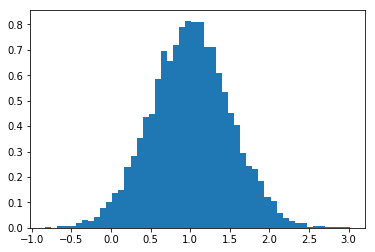

In [115]:
...# bins is the number bins the histogram 
# uses to compute counts. If density is true, the counts
# will compute normalised counts to approximate 
# probability density function.

#### Task 4: Write you own function to compute the analytical probability density function (PDF) of an univariate Gaussian distribution 
<p>The univariate Gaussian PDF is given by:
$$ p(x|\mu,\sigma^2) = \frac{1}{ \sqrt{2\pi\sigma^2}}\exp\left\{-\frac{1}{2 \sigma^2}(x - \mu)^2\right\} $$</p>
This is a probability density function of $x$ with $\mu$ and $\sigma^2$ as its parameters. 

In [116]:
def gaussian1d_pdf(x, mu, sigma):
    ... # write your own code: you can use np.pi for \pi and np.exp for
        # the exponential function
    

#### Task 5: Plot the Gaussian PDF

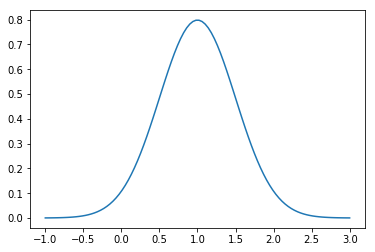

In [117]:
x_candidates = ... # use np.linspace to generate possible x for the plot
y = ... # compute the PDF with your own function
... # Plot the PDF

#### Task 6: Overlay the analytical Gaussian PDF and the empirical histogram.

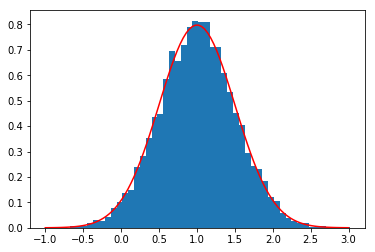

In [118]:
... # plot the histogram of previous generated x
... # plot the Gaussian PDF